In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
# For visualization
!pip install graphviz

import graphviz
from sklearn.tree import export_graphviz


In [3]:
# Load dataset
df = pd.read_csv("heart.csv")

# First look at data
print(df.shape)
df.head()

(1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Summary statistics
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.0

In [31]:
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isna().sum())


Data types:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_5736\409780249.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df, palette="Set2")


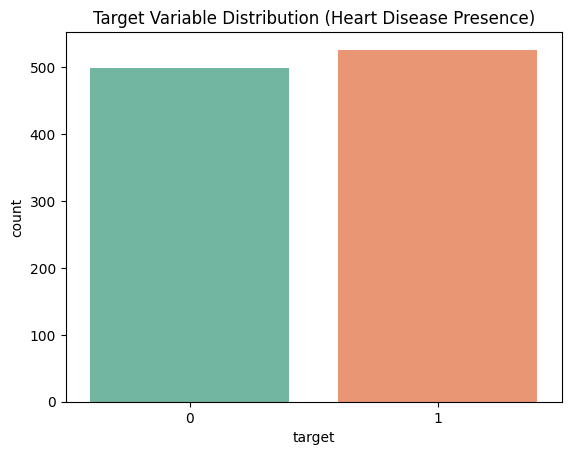

In [5]:
# Target variable distribution
sns.countplot(x="target", data=df, palette="Set2")
plt.title("Target Variable Distribution (Heart Disease Presence)")
plt.show()

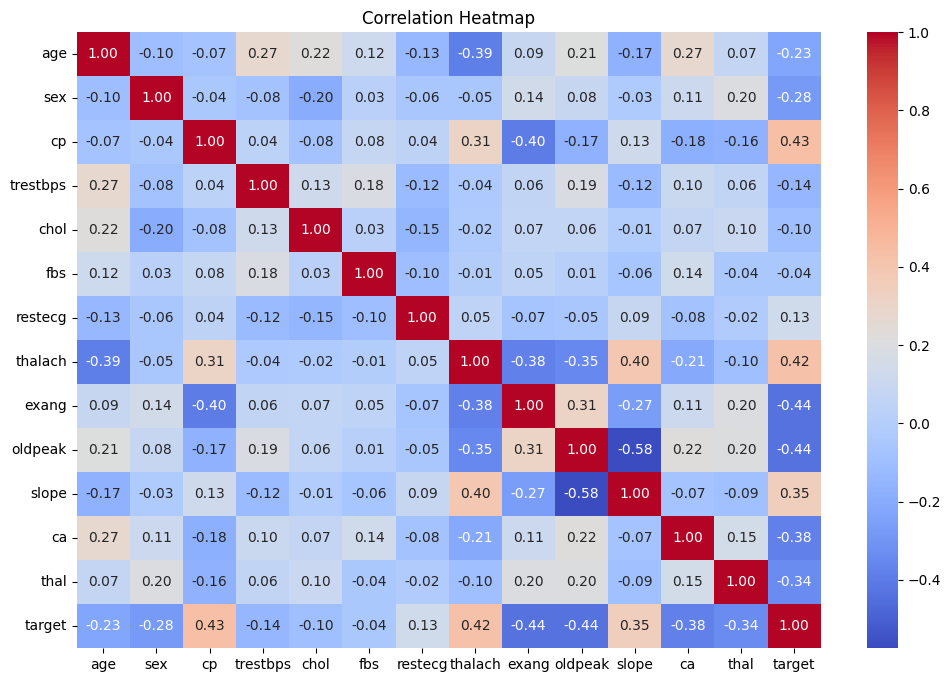

In [6]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [10]:
X = df.drop("target", axis=1)
y = df["target"]
# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)

Training size: (820, 13)
Testing size: (205, 13)


Decision Tree Accuracy: 0.9853658536585366

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



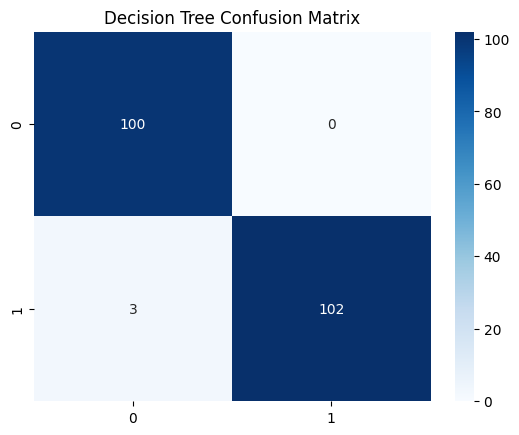

In [19]:
# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.show()

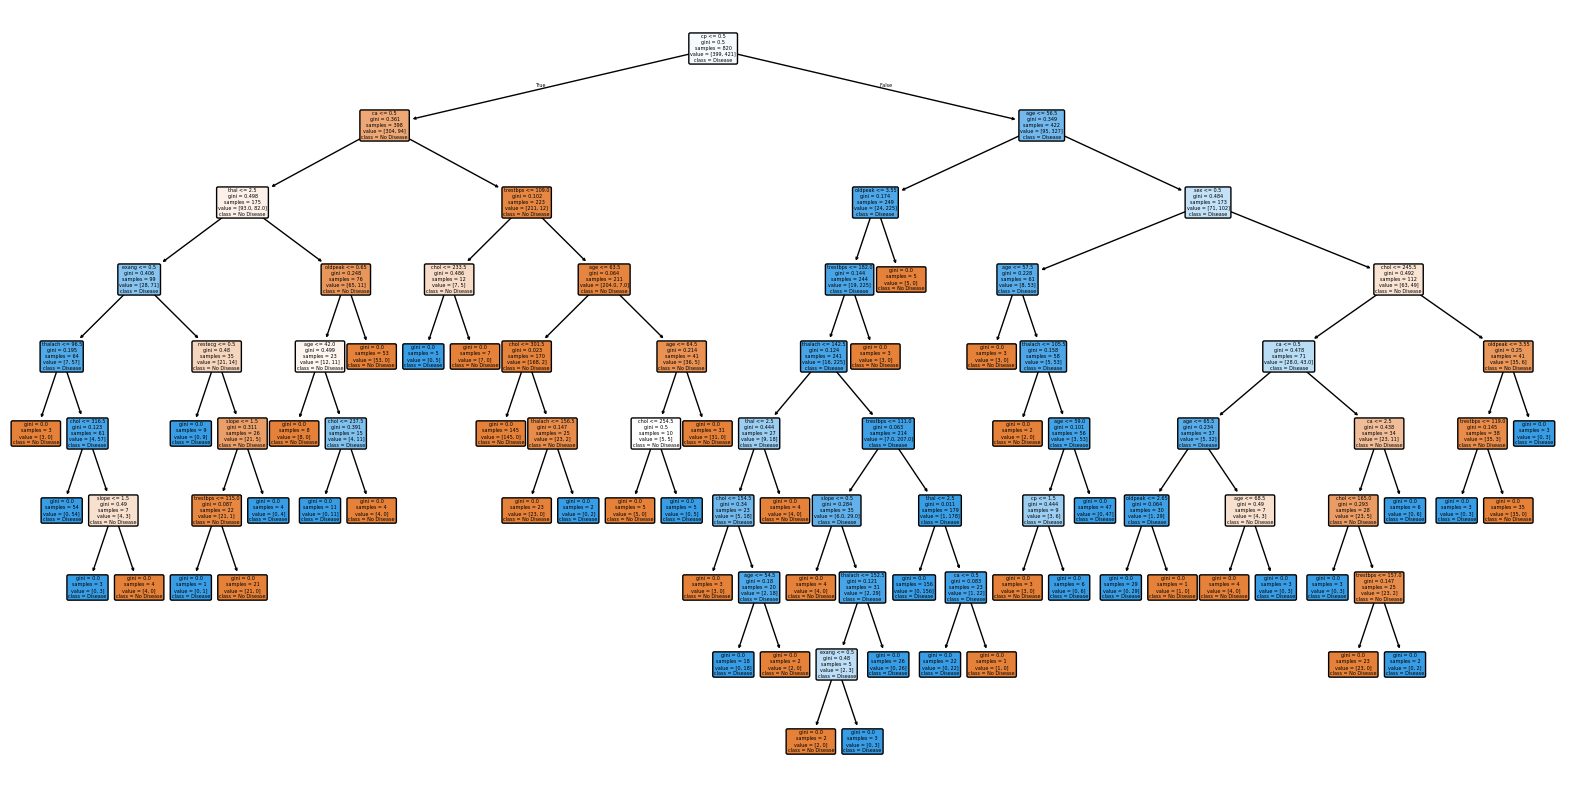

In [26]:
plt.figure(figsize=(20,10))
plot_tree(
    dt, 
    feature_names=X.columns, 
    class_names=["No Disease", "Disease"], 
    filled=True, 
    rounded=True
)
plt.show()

In [27]:
# Try limiting depth
dt_limited = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_limited.fit(X_train, y_train)

y_pred_limited = dt_limited.predict(X_test)
print("Decision Tree (max_depth=4) Accuracy:", accuracy_score(y_test, y_pred_limited))

Decision Tree (max_depth=4) Accuracy: 0.8390243902439024


Random Forest Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



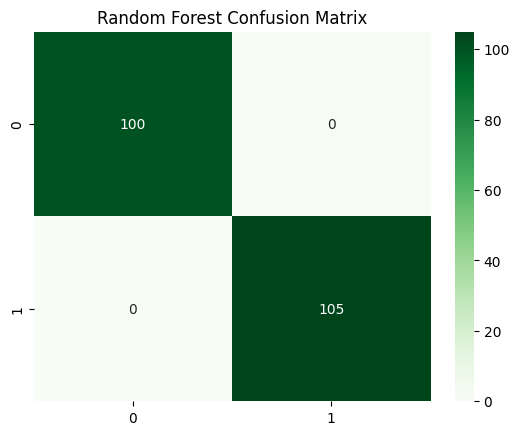

In [28]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [66]:
# Recreate and train Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Decision Tree feature importance
print("Decision Tree Feature Importances:")
for name, importance in zip(feature_names, dt_clf.feature_importances_):
    print(f"{name}: {importance:.3f}")

# Random Forest feature importance
print("\nRandom Forest Feature Importances:")
for name, importance in zip(feature_names, rf_clf.feature_importances_):
    print(f"{name}: {importance:.3f}")

Decision Tree Feature Importances:
sepal length (cm): 0.000
sepal width (cm): 0.019
petal length (cm): 0.893
petal width (cm): 0.088

Random Forest Feature Importances:
sepal length (cm): 0.104
sepal width (cm): 0.045
petal length (cm): 0.417
petal width (cm): 0.434


C:\Users\User\AppData\Local\Temp\ipykernel_5736\762805431.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=X.columns[indices], palette="viridis")


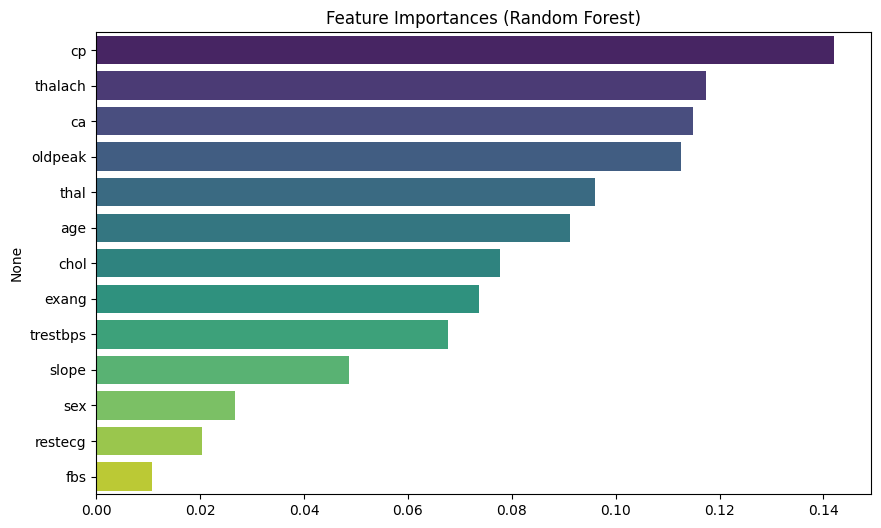

In [29]:
# Plot feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=X.columns[indices], palette="viridis")
plt.title("Feature Importances (Random Forest)")
plt.show()

In [30]:
# Cross-validation for Decision Tree
cv_dt = cross_val_score(dt, X, y, cv=5)
cv_rf = cross_val_score(rf, X, y, cv=5)

print("Decision Tree CV Accuracy:", np.mean(cv_dt))
print("Random Forest CV Accuracy:", np.mean(cv_rf))

Decision Tree CV Accuracy: 1.0
Random Forest CV Accuracy: 0.9970731707317073


In [64]:
# Recreate Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf_clf, X, y, cv=5)
print("Random Forest 5-Fold CV Accuracy:", cv_scores_rf)
print("Mean CV Accuracy:", cv_scores_rf.mean())

Random Forest 5-Fold CV Accuracy: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean CV Accuracy: 0.9666666666666668
